# **About Kernel**

This study aims to analyze a flight booking dataset obtained from the "Ease My Trip" website and perform various statistical hypothesis tests to derive meaningful insights. The primary statistical algorithm employed will be Linear Regression to train the dataset and predict continuous target variables. "Easemytrip" serves as an online platform for booking flight tickets, catering to potential passengers seeking ticket purchases. A comprehensive examination of the dataset promises to unveil valuable insights beneficial to passengers.

# **Meta Data**

The dataset comprises information pertaining to flight bookings made through the Easemytrip website for travel between India's top 6 metro cities. With a total of 300261 data entries and 11 features, the dataset offers insights into various aspects of flight bookings.

Here's a breakdown of the features in the cleaned dataset:

- **Airline**: Denotes the name of the airline company, categorized under 6 different airlines.
- **Flight**: Represents the flight code corresponding to each booking, classified as a categorical feature.
- **Source City**: Indicates the city of departure for the flight, with 6 unique city options.
- **Departure Time**: Derived categorical feature, segmenting departure times into bins with 6 distinct time labels.
- **Stops**: Categorical feature with 3 distinct values, representing the number of stops between source and destination cities.
- **Arrival Time**: Similar to Departure Time, this feature categorizes arrival times into bins with 6 unique labels.
- **Destination City**: Signifies the city of arrival for the flight, featuring 6 unique city options.
- **Class**: Categorical feature indicating the seat class, with two values: Business and Economy.
- **Duration**: Continuous feature representing the total travel time between cities, measured in hours.
- **Days Left**: Derived characteristic calculated by computing the difference between the trip date and the booking date.
- **Price**: Target variable capturing the ticket price associated with each booking.

In [1]:
#started by imported all the necessary package
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pydot
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

2024-03-28 00:18:36.731873: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# **Data sneak peak**

In [2]:
df = pd.read_csv("Clean_Dataset.csv")

print("Head information:")
display(df.head())
print("Shape information:")
display(df.shape)
print("Data Types:")
display(df.dtypes)
print("NAN Values")
display(df.isnull().sum())
print("Statistics information:")
display(df.describe().T)


Head information:


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Shape information:


(300153, 12)

Data Types:


Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

NAN Values


Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Statistics information:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


# **Categorical Variable Analysis**

In [3]:

# All possible categoric features
cat_features = [column for column in df.columns if df[column].dtype in ["object", "category", "bool"]]

# Numeric but categoric features
num_but_cat_features = [column for column in df.columns if (df[column].dtype in ["int64", "float64"]) and (df[column].nunique() < 9)]

# Categoric but cardinal features
cat_but_card_features = [column for column in df.columns if (df[column].dtype in ["object", "category", "bool"]) and (df[column].nunique() > 36)]

# Categoric features (final situation for categoric features)
categoric_features = cat_features + num_but_cat_features
categoric_features = [column for column in categoric_features if column not in cat_but_card_features]

df[categoric_features]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business


Extracting categorical features:
Initially, I compile columns with data types "object", "category", or "bool" as potential categorical features.
Numeric columns with fewer unique values (less than 9) are also included as they may represent categorical variables. I then exclude categorical features with high cardinality (more than 36 unique values) to avoid overloading. As for the 'categoric_features', it holds the final list of selected categorical features.
The DataFrame 'df' is filtered to retain only these categorical features.

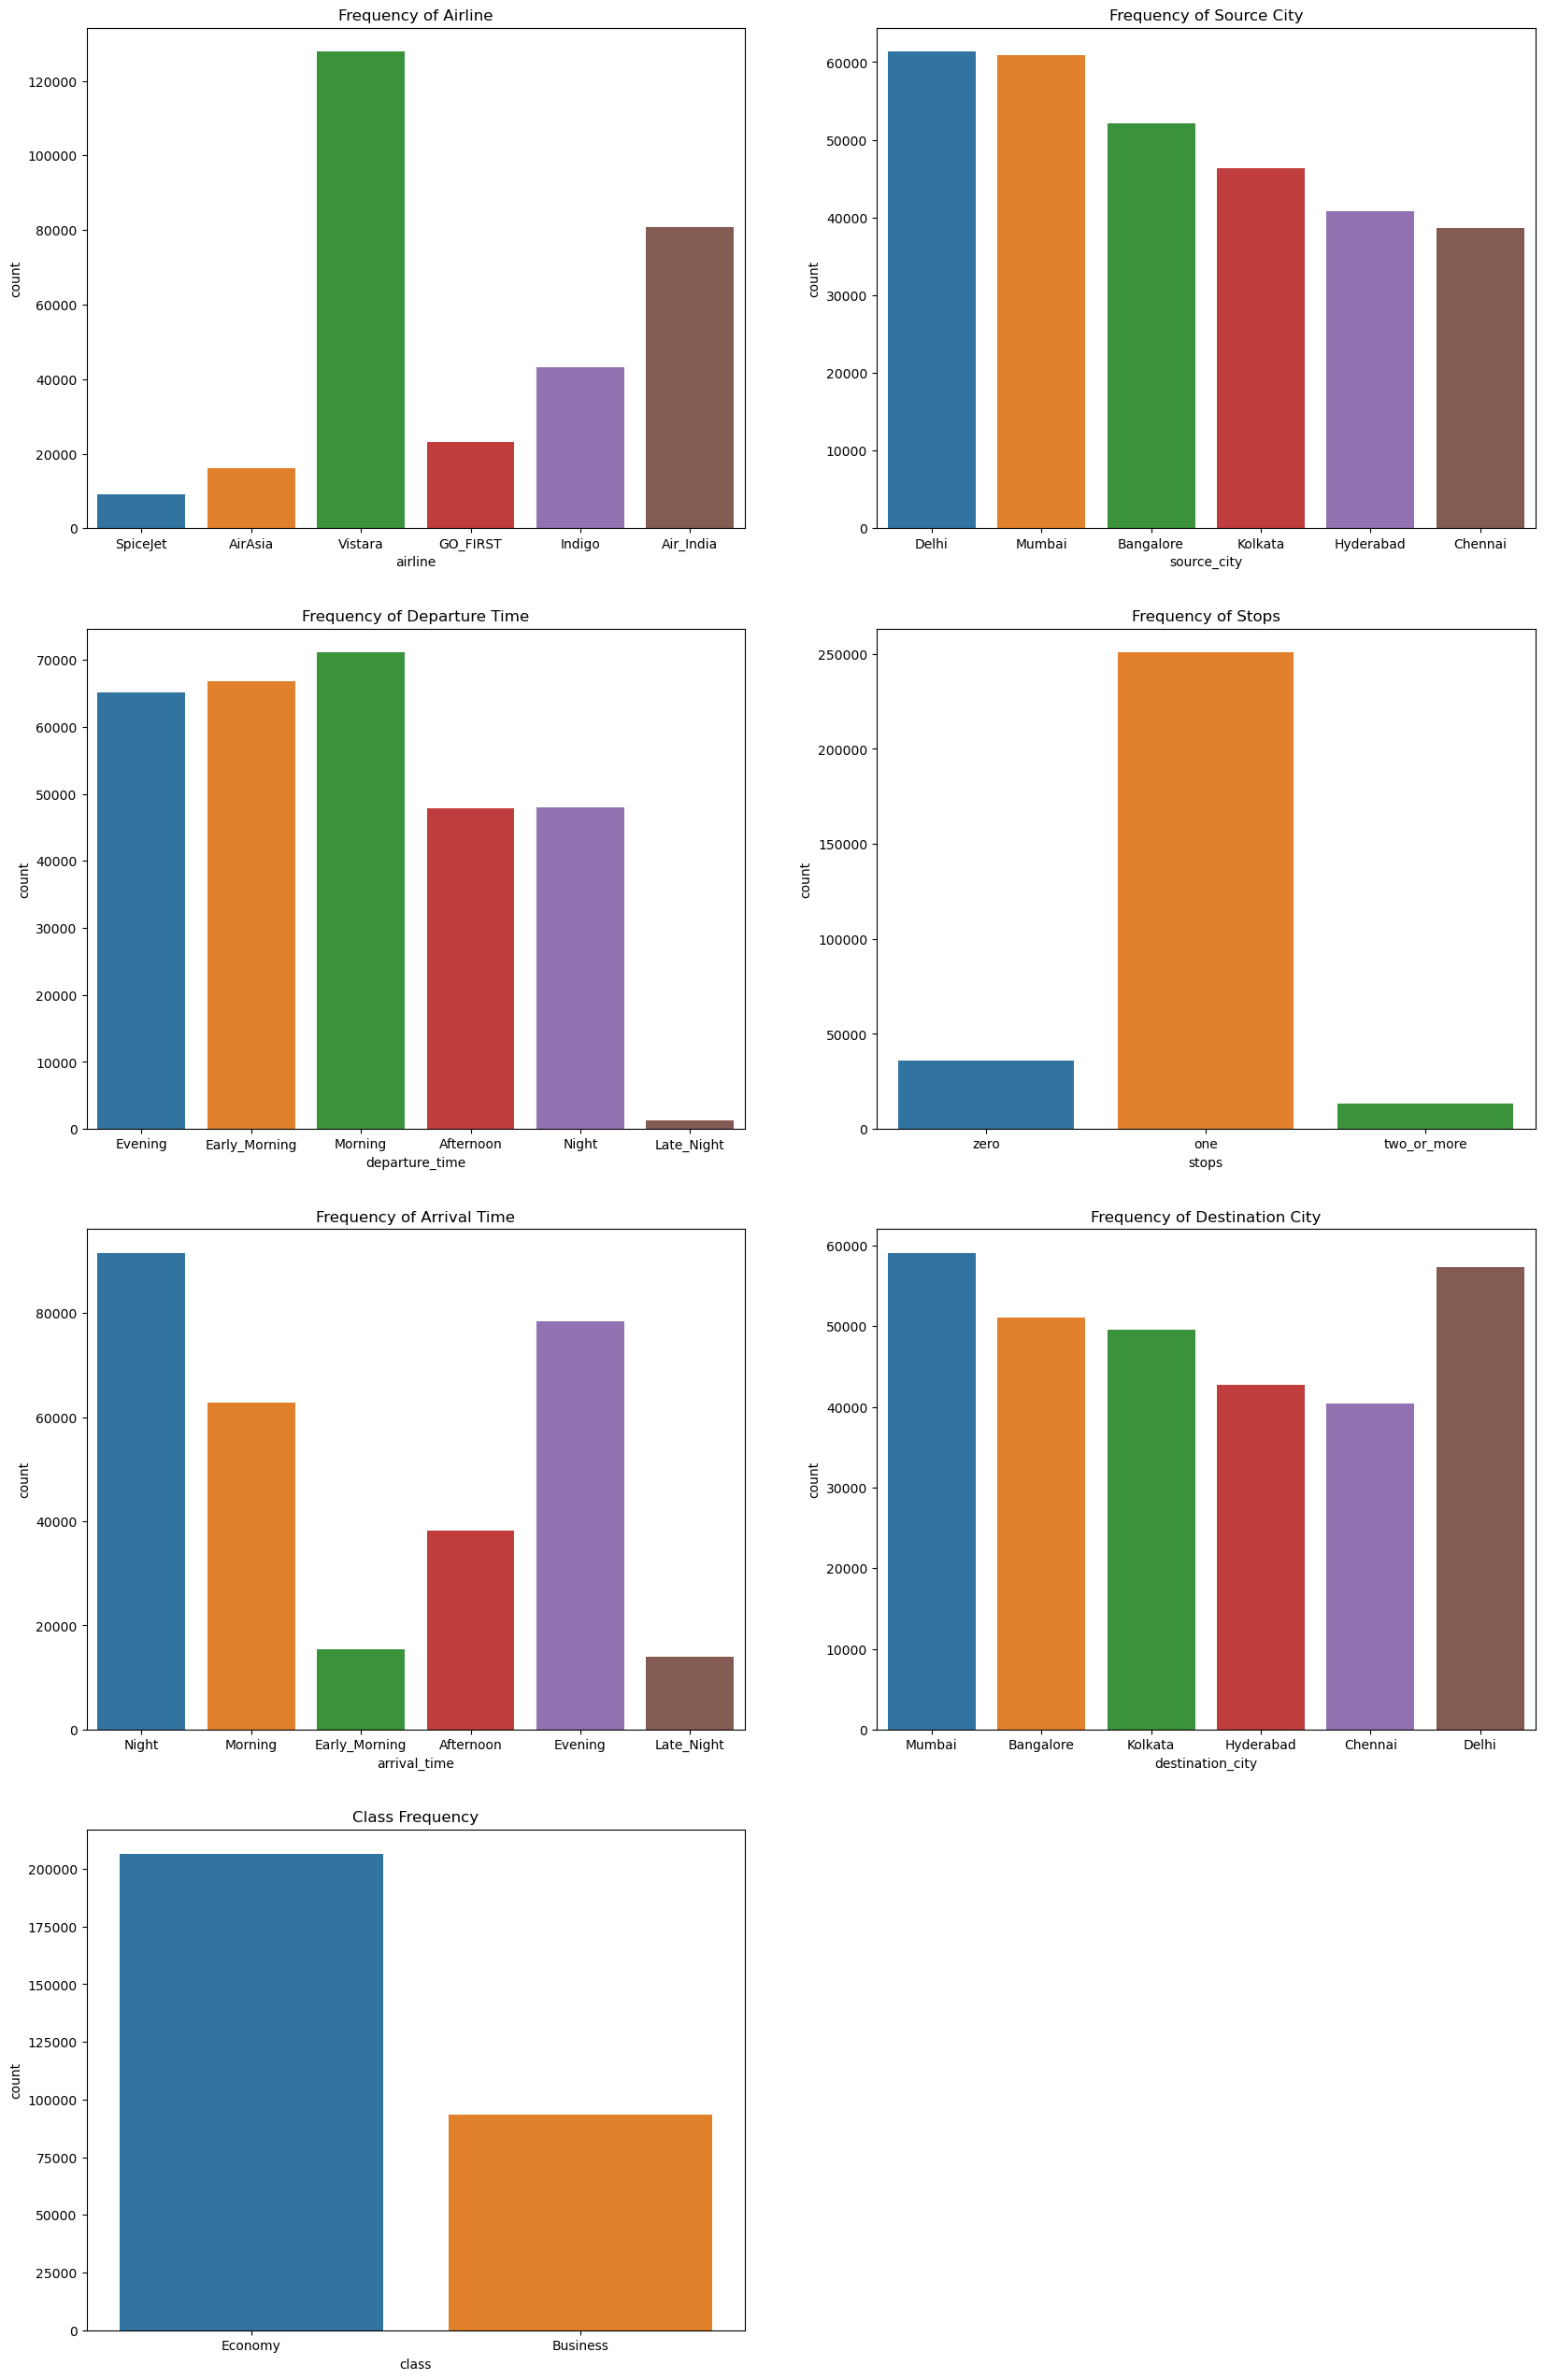

In [4]:
# Visualizations of categoric features with countplot, get a general picture about several 
plt.figure(figsize=(20,32))

plt.subplot(4, 2, 1)
sns.countplot(x=df["airline"], data=df)
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df)
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df)
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df)
plt.title("Frequency of Stops")

plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df)
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df)
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df)
plt.title("Class Frequency")

plt.show()

# **Numeric Variable Analysis**

In [5]:
# List out only numeric features in dataframe
numeric_features = [column for column in df.columns if (df[column].dtype in ["int64", "float64"]) and (column not in categoric_features)]

df[numeric_features]

,Unnamed: 0,duration,days_left,price
0,0,2.17,1,5953
1,1,2.33,1,5953
2,2,2.17,1,5956
3,3,2.25,1,5955
4,4,2.33,1,5955
...,...,...,...,...
300148,300148,10.08,49,69265
300149,300149,10.42,49,77105
300150,300150,13.83,49,79099
300151,300151,10.00,49,81585


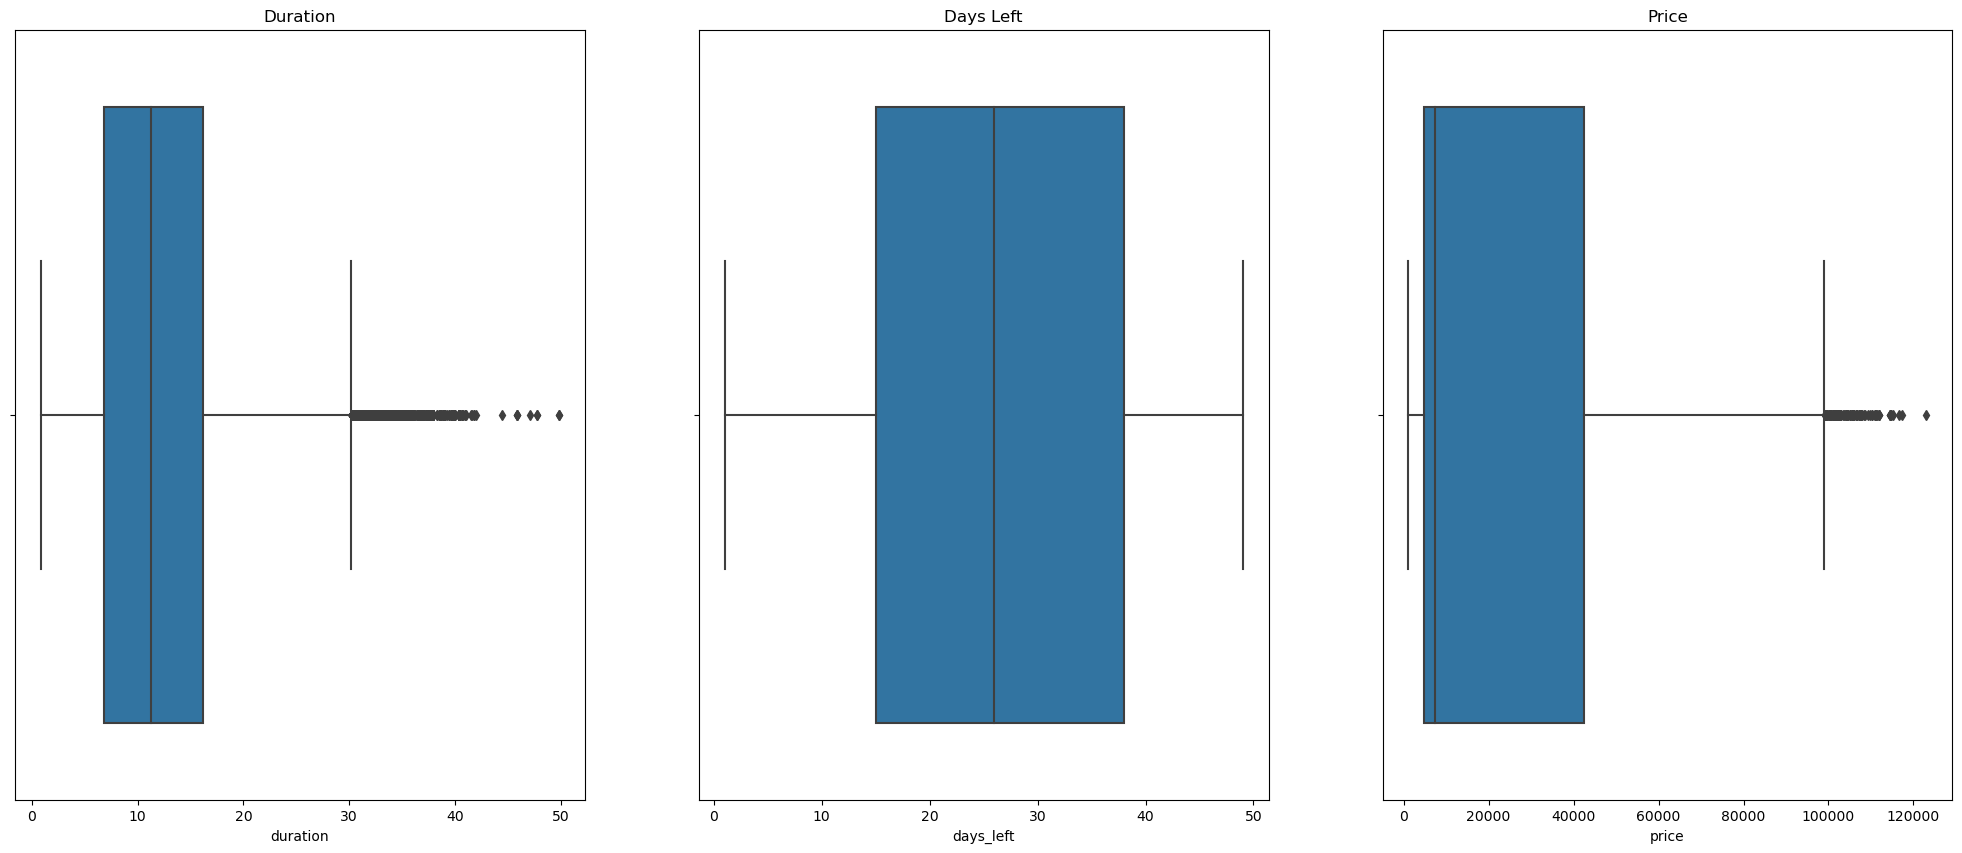

In [6]:
# Visualizations of numeric features with boxplot
plt.figure(figsize=(25,10))

plt.subplot(1, 3, 1)
sns.boxplot(x=df["duration"], data=df)
plt.title("Duration")

plt.subplot(1, 3, 2)
sns.boxplot(x=df["days_left"], data=df)
plt.title("Days Left")

plt.subplot(1, 3, 3)
sns.boxplot(x=df["price"], data=df)
plt.title("Price")

plt.show()

# **Target Variable Analysis**

In [7]:

for feature in categoric_features:
    print("\n##################################")
    analysis = df.groupby(feature).agg({"price" : ["mean"]})
    print('Analysis with "{}":\n\n'.format(feature), analysis)


##################################
Analysis with "airline":

                   price
                   mean
airline                
AirAsia     4091.072742
Air_India  23507.019112
GO_FIRST    5652.007595
Indigo      5324.216303
SpiceJet    6179.278881
Vistara    30396.536302

##################################
Analysis with "source_city":

                     price
                     mean
source_city              
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839

##################################
Analysis with "departure_time":

                        price
                        mean
departure_time              
Afternoon       18179.203331
Early_Morning   20370.676718
Evening         21232.361894
Late_Night       9295.299387
Morning         21630.760254
Night           23062.146808

##################################
Analysis with "stops":

                     price
  

# **Correlation Analysis**

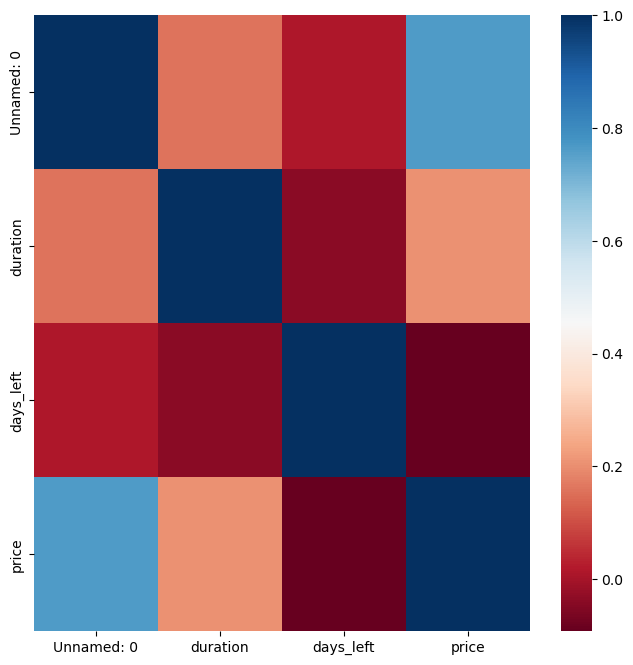

In [8]:
corr = df[numeric_features].corr()

# Heatmap to look at correlation
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap="RdBu")
plt.show()

In [9]:
# Drop the correlation if the value is above 90%
corr_matrix = df[numeric_features].corr().abs()
corr_upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype("bool"))
drop_list = [column for column in corr_upper_triangle_matrix.columns if any(corr_upper_triangle_matrix[column]>0.90)]

print("the length of drop list : ", len(drop_list))

the length of drop list :  0


# **Preprocessing of the data**

In [10]:
# Transfer data in "stop" and "class" variables from ordinal to numeric variables.
df["stops"] = df["stops"].replace({'zero': 0,
                                   'one': 1,
                                   'two_or_more': 2})

df["class"] = df["class"].replace({'Economy': 0,
                                   'Business': 1})

# Use the One Hot Encoding technique
dummies_variables = ["airline", "source_city", "departure_time", "arrival_time", "destination_city"]
dummies = pd.get_dummies(df[dummies_variables], drop_first= True)

df = pd.concat([df, dummies], axis=1)
df = df.drop(["airline", "source_city", "departure_time", "arrival_time", "destination_city"],axis=1)

# Drop cardinal variables because they don't hold 
df.drop(cat_but_card_features, axis=1, inplace=True)

# Drop "Unnamed: 0"
df.drop("Unnamed: 0", axis=1, inplace=True)

# Scaling of Numerical Features
scaler = MinMaxScaler()

num_vars = ['duration', 'days_left', 'price']
df[num_vars] = scaler.fit_transform(df[num_vars])

df.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0.027347,0.0,0.039749,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0.030612,0.0,0.039749,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0.027347,0.0,0.039773,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0.028980,0.0,0.039765,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.030612,0.0,0.039765,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


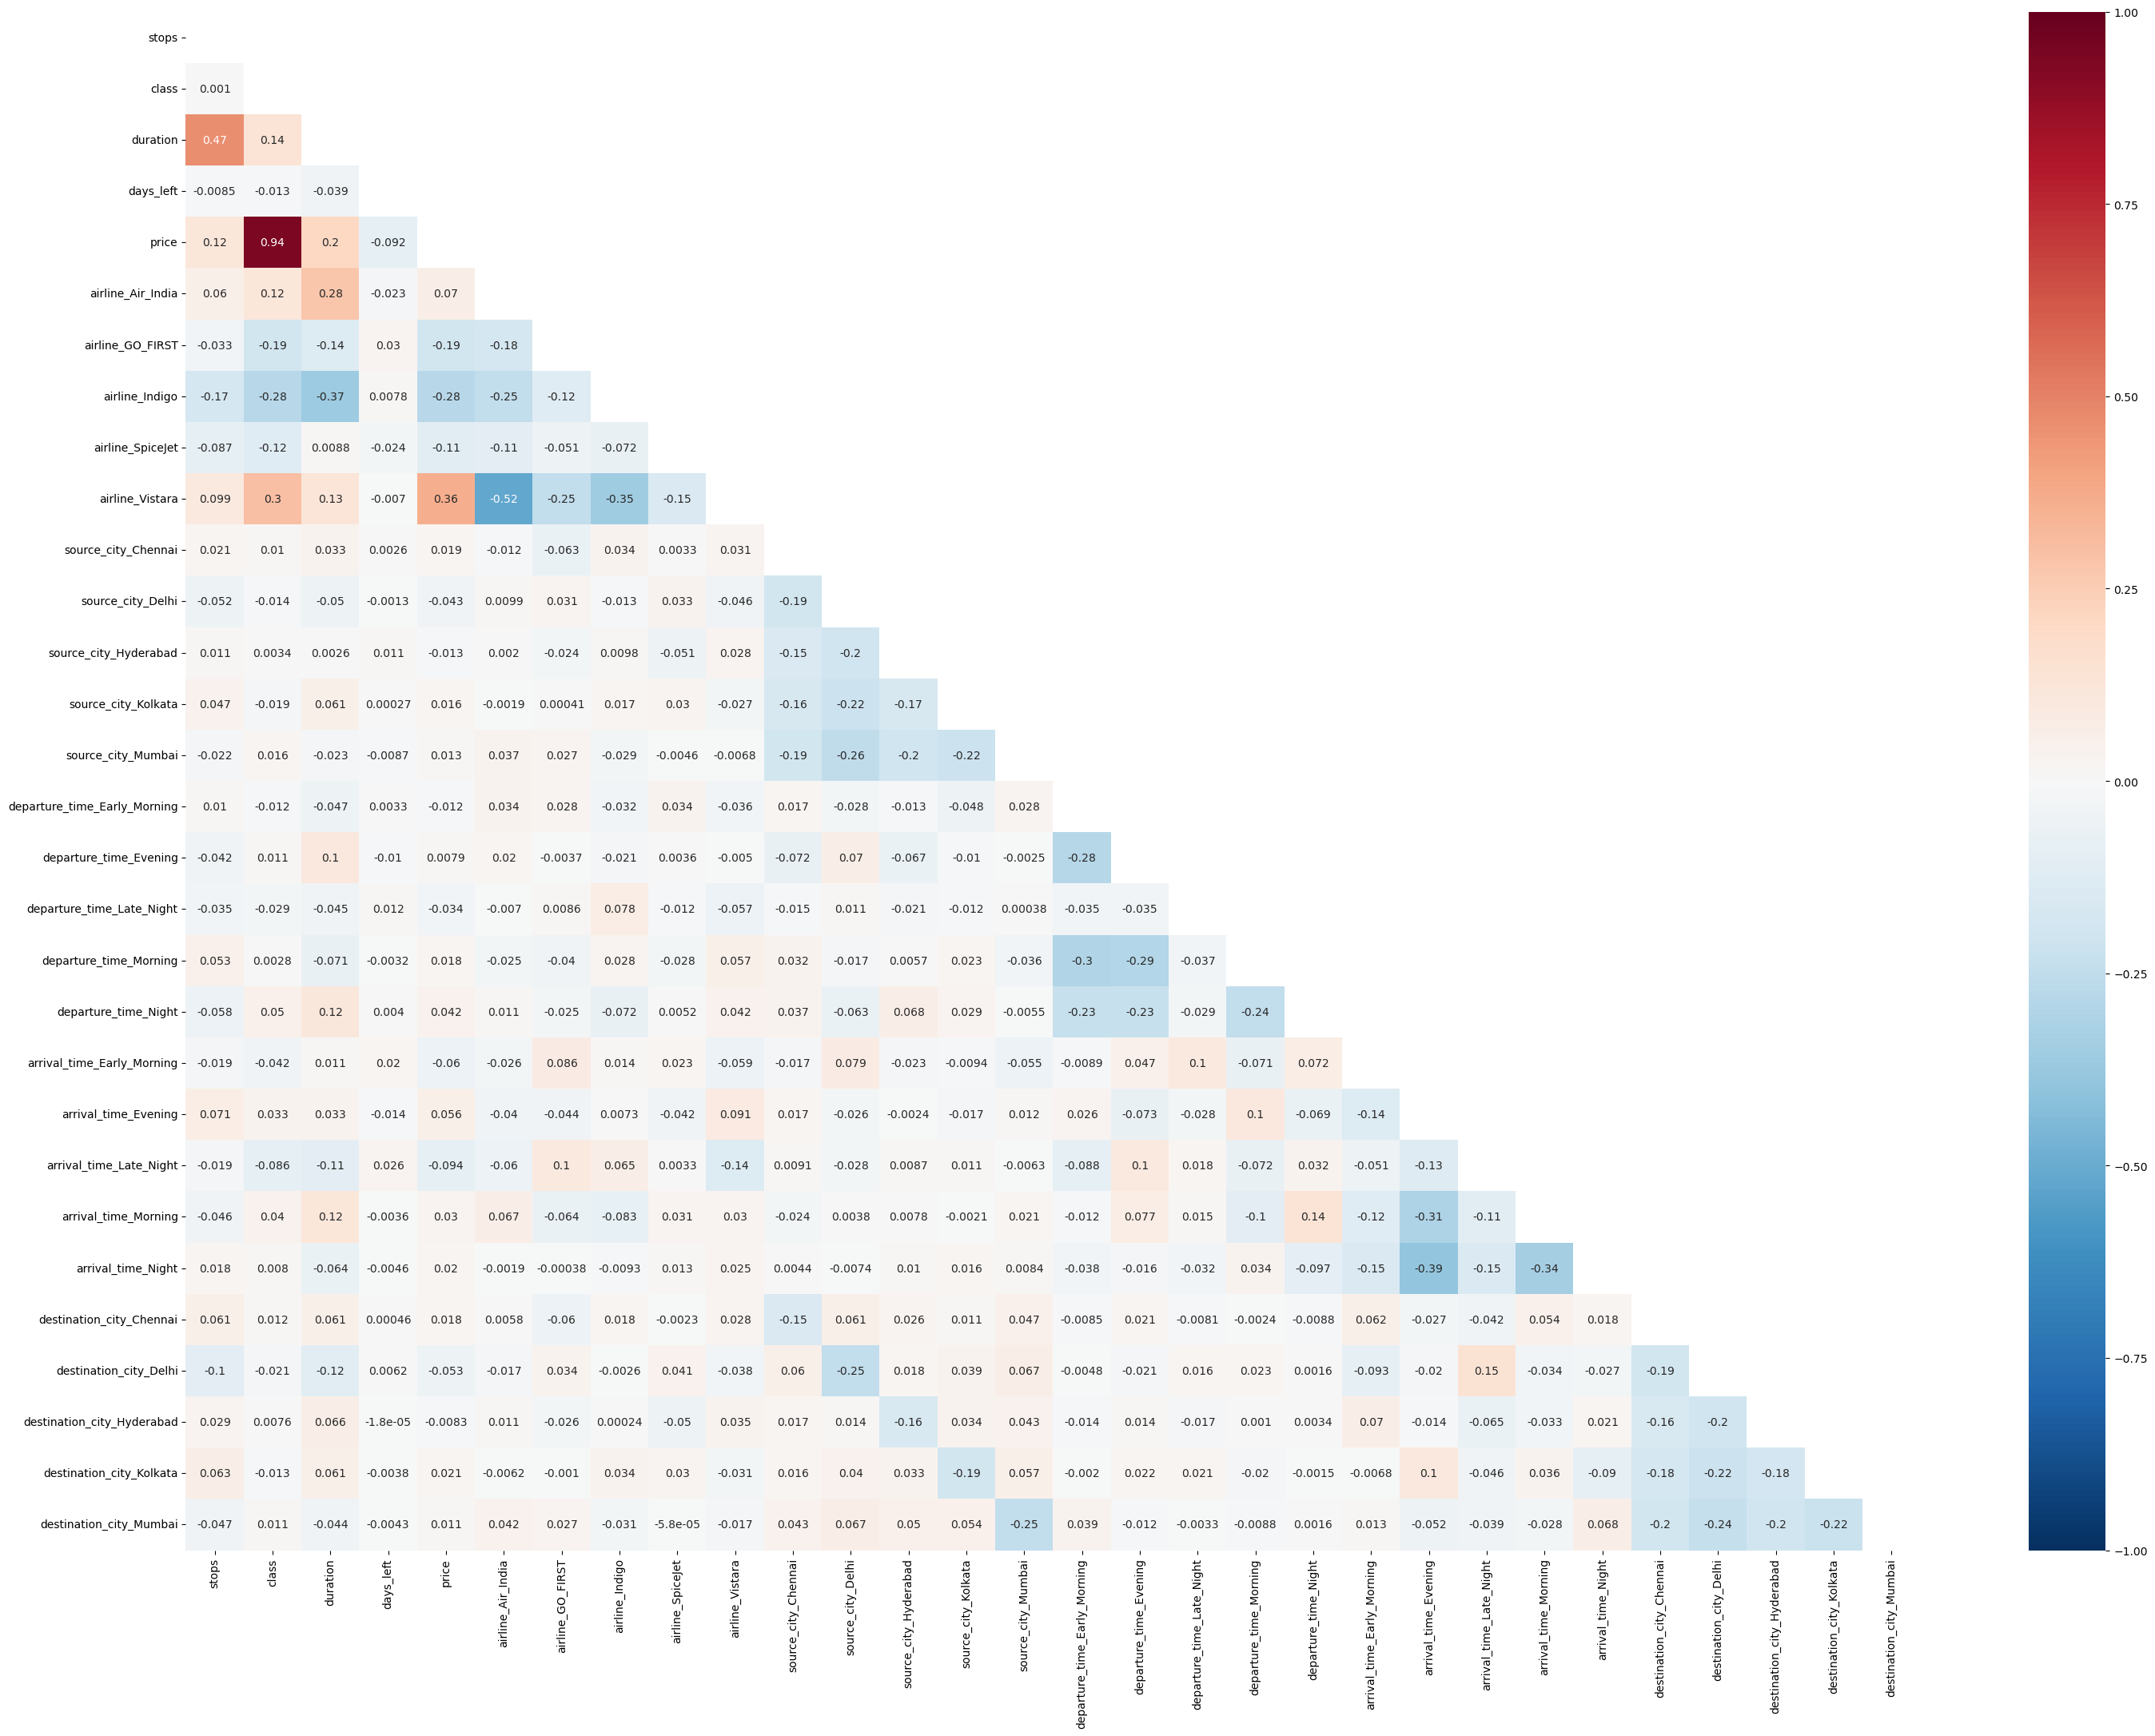

In [11]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize = (35, 25))
sns.heatmap(df.corr(), mask=mask, annot=True, vmin=-1.0, vmax=1.0, center=0, cmap='RdBu_r')
plt.show()

# **ML Model - Linear Regression**

In [ ]:

# Separate features (X) and target variable (y)
Y = df["price"]
X = df.drop(["price"], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 7)

In [13]:
# model building
lm = LinearRegression()
lm.fit(X_train,Y_train)

# lm.intercept_
# lm.coef_ 

Y_pred = lm.predict(X_test)

In [14]:
# MSE
print("MSE: ", mean_squared_error(Y_test, Y_pred))

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))

# MAE
print("MAE: ", np.sqrt(mean_absolute_error(Y_test, Y_pred)))
      
# R2 Score
print("R2 Score: ", r2_score(Y_test, Y_pred))

MSE:  0.003160710783795063
RMSE:  0.05622019907288717
MAE:  0.19283776777610828
R2 Score:  0.909072475137165


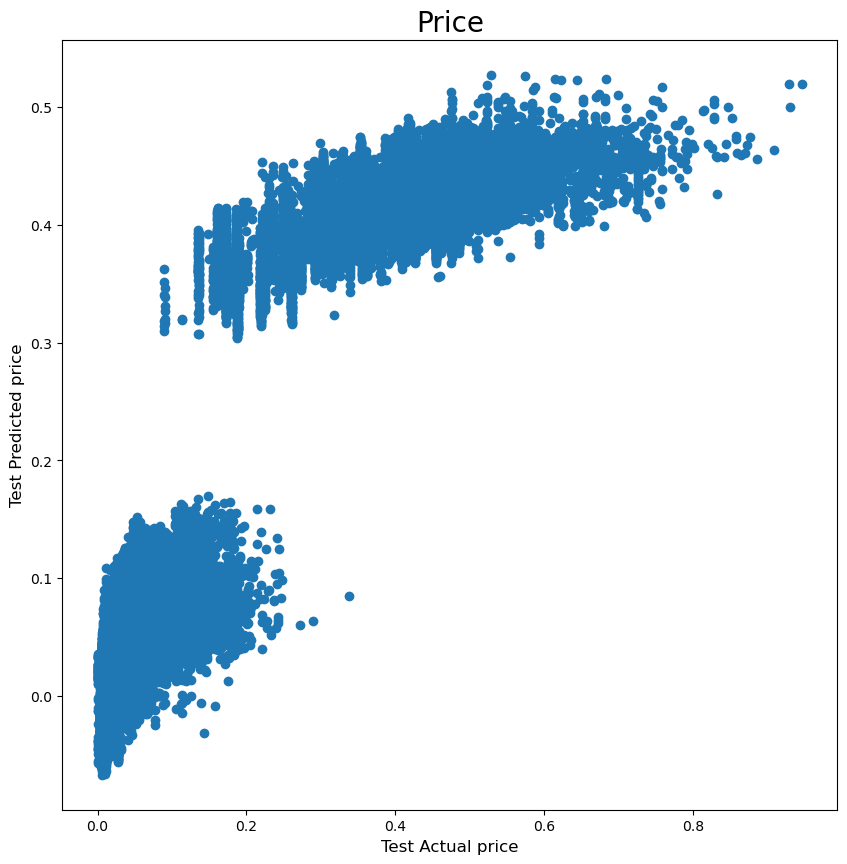

In [15]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_title("Price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(Y_test, Y_pred)
plt.show()

# **ML Model - Neural Network**

In [16]:
# Separate features (X) and target variable (y)
X = df.drop('price', axis=1)
Y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.Sequential()

# Input layer
model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

# Hidden layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(1, activation='linear'))  # Using linear activation

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/10
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 2/10
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/10
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 4/10
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/10
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/10
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/10
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/10
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/10
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/10
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - loss: 0.0010 - val_loss: 0.0011


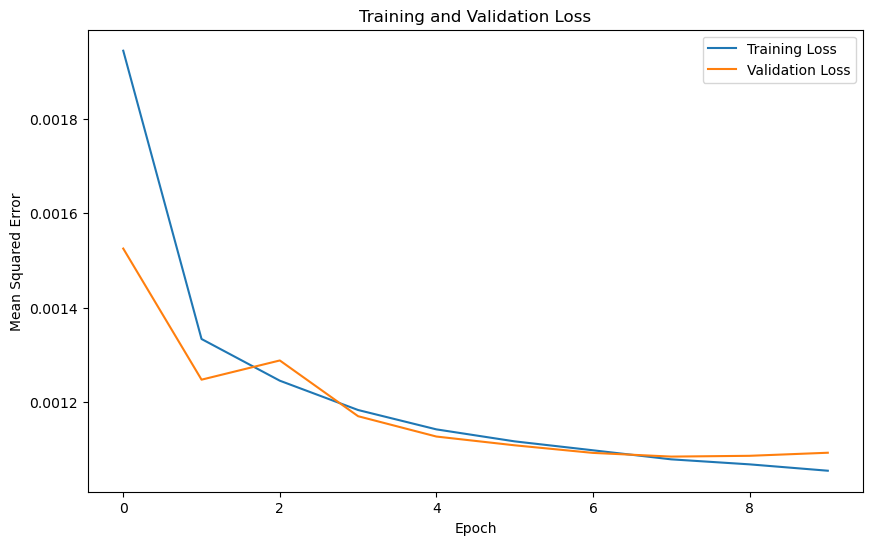

In [17]:
# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot the loss graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [18]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, Y_test)
print(f"Mean Squared Error on Test Set: {loss}")

1876/1876 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0011
Mean Squared Error on Test Set: 0.0011297462042421103
